In [7]:
import numpy as np
import skfuzzy as fuzz
# control: objeto para aplicar control
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt

#### Variables de entrada y salida

In [10]:
# entrada :
error = ctrl.Antecedent(np.arange(-20, 20, 0.1), 'error')

# salida :
voltaje = ctrl.Consequent(np.arange(-12, 12, 0.1), 'voltaje')


# x = np.arange(10)
# mfx = fuzz.trimf(x, [0, 5, 10]) # Obtiene los grados de pertenencia



#### Funciones de membresía

In [12]:
# Entrada
error['ENG'] = fuzz.trapmf(error.universe, [-20, -20, -10, -5])
error['ENP'] = fuzz.trimf(error.universe, [-10, -5, 0])
error['EC'] = fuzz.trimf(error.universe, [-5, 0, 5])
error['EPP'] = fuzz.trimf(error.universe, [0, 5, 10])
error['EPG'] = fuzz.trapmf(error.universe, [5, 10, 20, 20])

# Salida
voltaje['VNG'] = fuzz.trapmf(voltaje.universe, [-12, -12, -6, -3])
voltaje['VNP'] = fuzz.trimf(voltaje.universe, [-6, -3, 0])
voltaje['VC'] = fuzz.trimf(voltaje.universe, [-3, 0, 3])
voltaje['VPP'] = fuzz.trimf(voltaje.universe, [0, 3, 6])
voltaje['VPG'] = fuzz.trapmf(voltaje.universe, [3, 6, 12, 12])

#### Mostrar la funciones de pertenencia

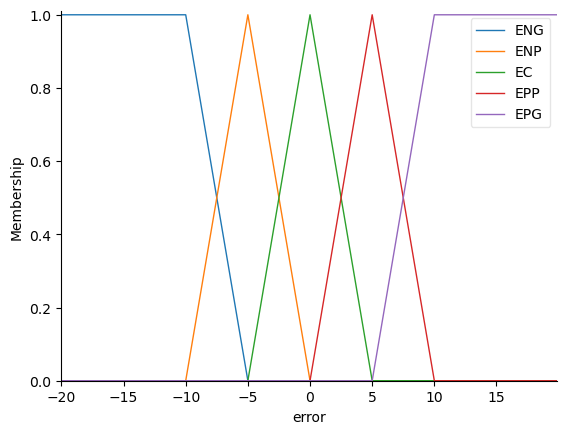

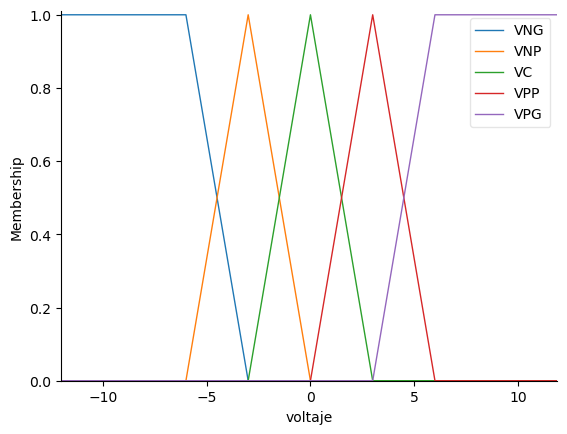

In [16]:
error.view()
voltaje.view()

#### Reglas para el control Fuzzy

In [17]:
rule1 = ctrl.Rule(error['ENG'], voltaje['VNG'])
rule2 = ctrl.Rule(error['ENP'], voltaje['VNP'])
rule3 = ctrl.Rule(error['EC'], voltaje['VC'])
rule4 = ctrl.Rule(error['EPP'], voltaje['VPP'])
rule5 = ctrl.Rule(error['EPG'], voltaje['VPG'])

In [20]:
# Unificando la reglas definidas
reglas_gen = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# clip_to_bounds: Que no se salga de los límites del antecedente y consecuente
reglas = ctrl.ControlSystemSimulation(control_system=reglas_gen, clip_to_bounds=True)


#### Validando del módelo

4.744902912621322


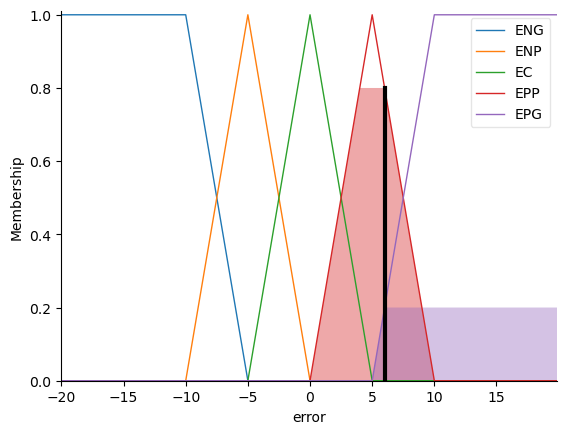

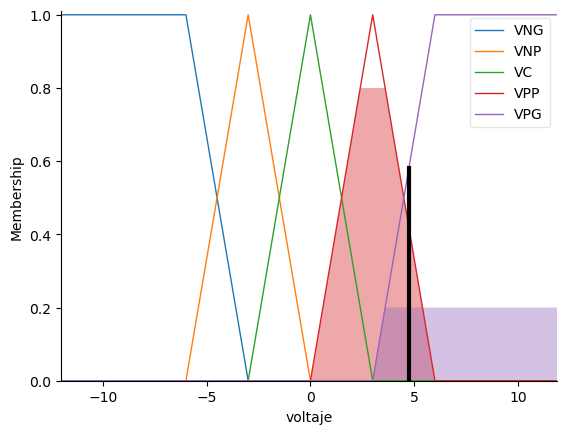

In [ ]:
error_calc = 8.4
# Calcular la salida en función a los parámetros definidos
reglas.input['error'] = 

reglas.compute()
output = reglas.output['voltaje']

print(output)

error.view(sim=reglas)
voltaje.view(sim=reglas)


TypeError: '_InputAcceptor' object is not subscriptable